# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [287]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results_df=pd.merge(study_results,mouse_metadata,how='left',on='Mouse ID')

# Display the data table for preview
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [288]:
#to see if there is any value missing
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [289]:
# Checking the number of mice.
results_df['Mouse ID'].nunique()

249

In [290]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicados_data = results_df[results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dup_id = duplicados_data['Mouse ID'].unique()
dup_id

array(['g989'], dtype=object)

In [291]:
# Optional: Get all the data for the duplicate mouse ID.
dupl_df=results_df.loc[results_df["Mouse ID"]== dup_id[0]]
dupl_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [292]:

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data= results_df.loc[results_df['Mouse ID']!='g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [294]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

248

## Summary Statistics

In [295]:
tumor_avr= clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_med=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var= clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_stdv= clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem= clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [296]:
tumor_avr= clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_avr.head()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [297]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summaty_statis= pd.DataFrame({"Mean Tumor Volume":tumor_avr,"Median Tumor Volume":tumor_med,"Tumor Volume Variance":tumor_var,
                              "Tumor Volume Std. Dev.":tumor_stdv,"Tumor Volume Std. Err.":tumor_sem})
summaty_statis

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [298]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
summary.columns=pd.MultiIndex.from_tuples([("Tumor Volume (mm3)",stat) for stat in summary.columns])
summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

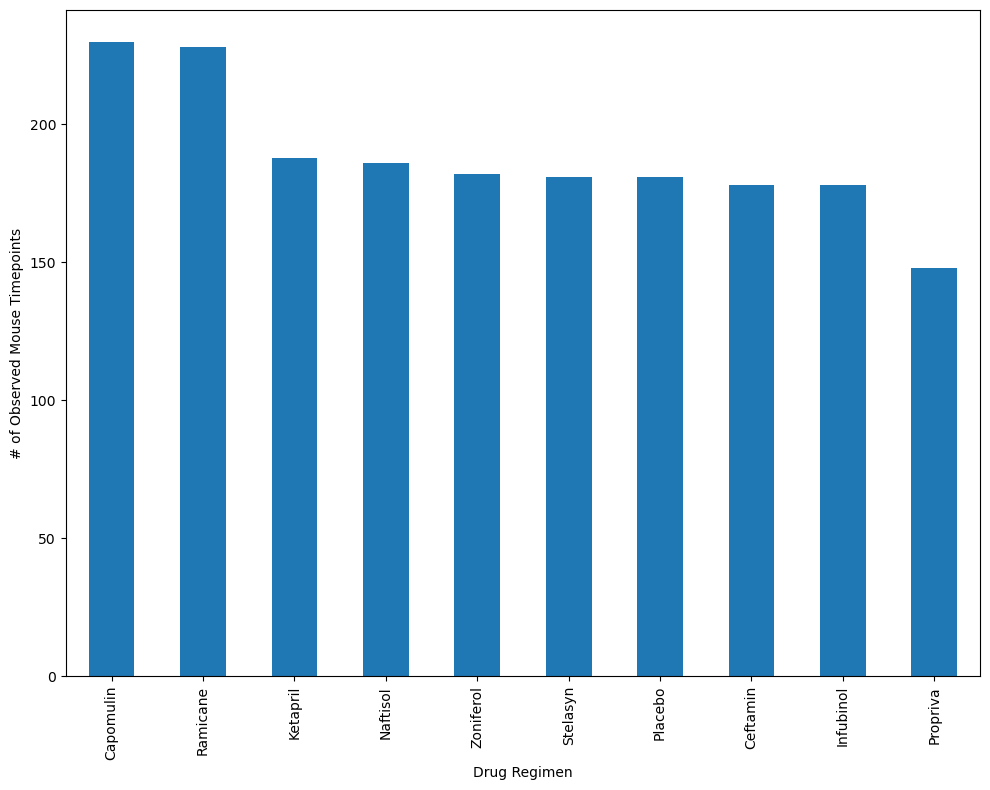

In [299]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_mouse_time=clean_data.groupby("Drug Regimen")["Mouse ID"].count()
total_bar=total_mouse_time.sort_values(ascending=False)
bar_plot=total_bar.plot(kind="bar",figsize=(10,8))
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

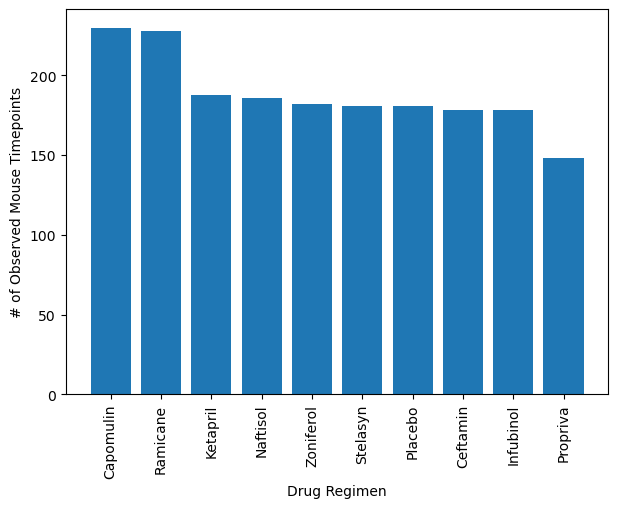

In [301]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_mouse_time=clean_data.groupby("Drug Regimen")["Mouse ID"].count()
total_drug=total_mouse_time.sort_values(ascending=False)
total_drug

    
plt.figure(figsize=(7,5))

plt.bar(total_drug.index,total_drug.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='count'>

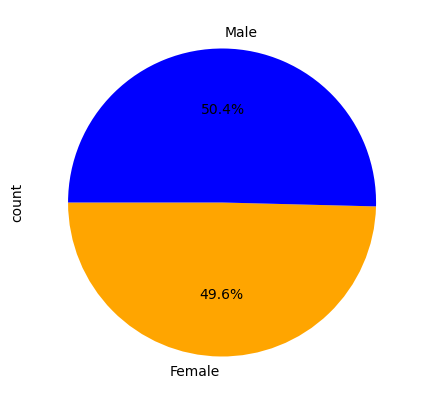

In [302]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

gender_df=clean_data.groupby("Sex")["Mouse ID"].nunique() 
labels=['Female','Male']
colors=['orange','blue']

# Make the pie chart
gender_df.plot(kind='pie',figsize=(5,5),colors=colors,
               labels=labels,ylabel='count',autopct="%1.1f%%",startangle=180)

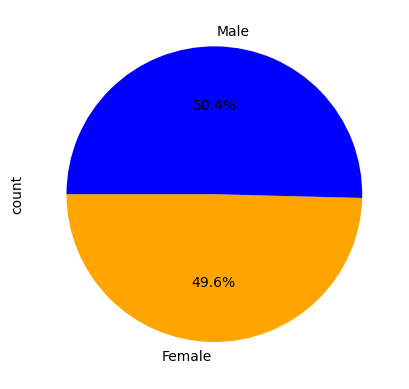

In [303]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
labels=['Female','Male']
colors=['orange','blue']

# Make the pie chart
plt.pie(gender_df,labels=labels,colors=colors,
        autopct="%1.1f%%",startangle=180)
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [304]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
treatments=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
four_t=clean_data[clean_data["Drug Regimen"].isin(treatments)]
final_tumor=four_t.groupby("Mouse ID").last()["Tumor Volume (mm3)"]
# Start by getting the last (greatest) timepoint for each mouse
great_mo= clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_data=pd.merge(clean_data,great_mo,on=['Mouse ID'],how='inner')
final_data

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [305]:
clean_data["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [306]:
treatments=['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
outliers_dictio={}

for treatment in treatments:
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
       treat_data=final_data[final_data["Drug Regimen"]==treatment]
       tumor_df=treat_data["Tumor Volume (mm3)"]

        # Calculate quartiles and IQR
       quartiles= tumor_df.quantile([.25,.5,.75])
       lowerq = quartiles[0.25]
       upperq = quartiles[0.75]
       iqr = upperq-lowerq 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
       lower_bound = lowerq - (1.5*iqr)
       upper_bound = upperq + (1.5*iqr)

       #Find Outliers
       outlier_tumor = treat_data.loc[(treat_data['Tumor Volume (mm3)'] < lower_bound) | (treat_data['Tumor Volume (mm3)'] > upper_bound)]
       #store outliers
       outliers_dictio[treatment]=outlier_tumor["Mouse ID"].tolist()
       tumor_vol.append(treat_data)


for treatment, outlier_tumor in outliers_dictio.items():
       print(f"{treatment}'s potential outliers: {tumor_df[tumor_df.index.isin(outlier_tumor)]}")
     

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ketapril's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Naftisol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Stelasyn's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Zoniferol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Propriva's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Placebo's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [307]:
print(f"The lower quartile of Tumor volume is: {lowerq}")
print(f"The upper quartile of Tumor volume is: {upperq}")
print(f"The interquartile range of Tumor volume is: {iqr}")
print(f"The the median of Tumor volume is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Tumor volume is: 47.2084271125
The upper quartile of Tumor volume is: 56.801437570000004
The interquartile range of Tumor volume is: 9.593010457500007
The the median of Tumor volume is: 51.77615728 
Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outliers.


C:\Users\Mel\AppData\Local\Temp\ipykernel_18620\3212950335.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(treatment_data,


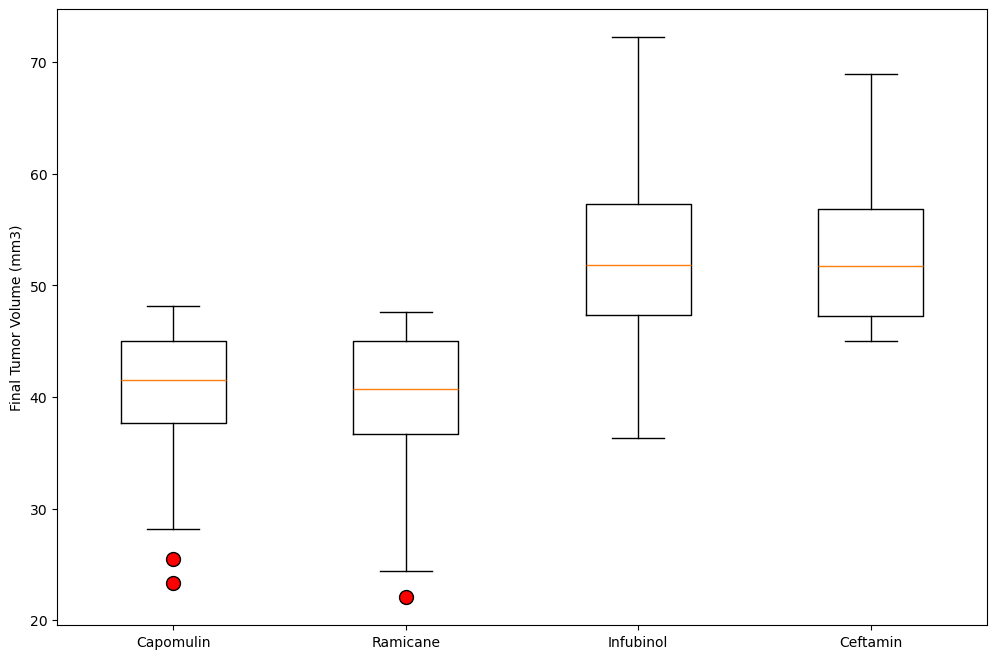

In [309]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list of tumor volumes for each treatment
treatment_data = []
for treatment in treatments:
    # Get tumor volumes for current treatment
    treatment_vol = final_data[final_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    treatment_data.append(treatment_vol)

# Create figure and axis with specified size
plt.figure(figsize=(12, 8))

# Create box plot
plt.boxplot(treatment_data, 
            labels=treatments,
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 10})

# Set labels
plt.ylabel('Final Tumor Volume (mm3)')

# Show plot
plt.show()

## Line and Scatter Plots

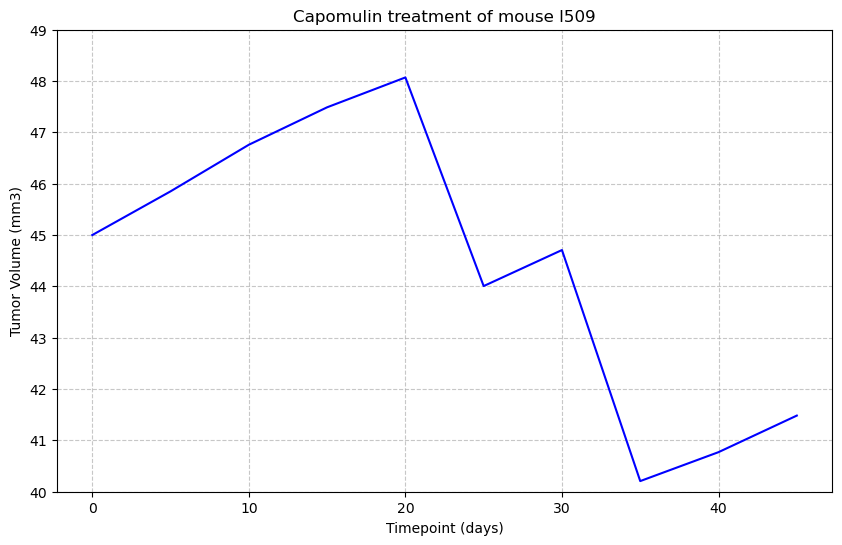

In [ ]:
mouse_id = "l509"
 
# Filter data for Capomulin treatment and specific mouse
mouse_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & 
                       (clean_data["Mouse ID"] == mouse_id)]
 

# Sort the data by timepoint to ensure correct line plot
mouse_data = mouse_data.sort_values('Timepoint')
 
# Create the plot
plt.figure(figsize=(10, 6))
 
# Create line plot
plt.plot(mouse_data['Timepoint'], 
         mouse_data['Tumor Volume (mm3)'],
         color='blue',
         linestyle='-',
         markersize=4)
 
# Customize the plot
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
 
# Set y-axis limits to match the example
plt.ylim(40, 49)
 
# Add grid
plt.grid(True, linestyle='--', alpha=0.7)
 
# Show the plot
plt.show()

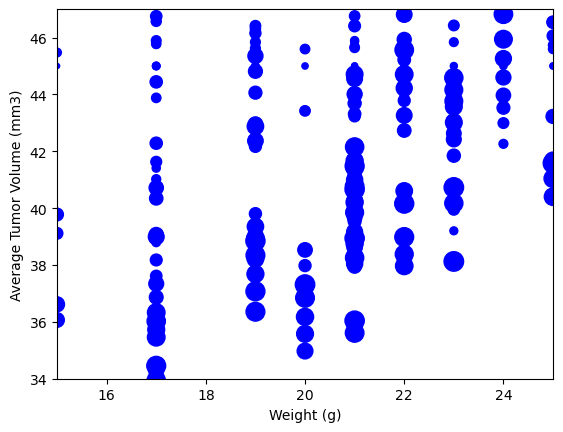

In [262]:
mean_tumor_v = clean_data[clean_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"].mean()
averag = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") | 
                        (clean_data["Tumor Volume (mm3)"] == mean_tumor_v), :]
mouse_weith=averag["Weight (g)"]
tumor=averag["Tumor Volume (mm3)"]
scoop=np.linspace(10,200,len(mouse_weith))

plt.scatter(mouse_weith,tumor, color='blue',s=scoop)
plt.xlim(15,25)
plt.ylim(34,47)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [341]:

capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
mean_tumor= capomulin_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean_tumor



Drug Regimen
Capomulin    40.675741
Name: Tumor Volume (mm3), dtype: float64

The correlation between mouse weight and the average tumor volume is 0.53


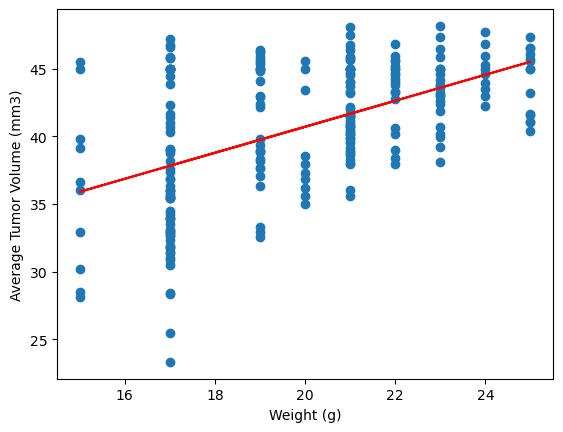

In [340]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mean_tumor_v = clean_data[clean_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"].mean()
averag = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") | 
                        (clean_data["Tumor Volume (mm3)"] == mean_tumor_v), :]
x_values=averag["Weight (g)"]
y_values=averag["Tumor Volume (mm3)"]

correlation = round(st.pearsonr(x_values, y_values)[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
